In [138]:
# Input: iris.data.txt (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
# Output: Classification by kNN
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# set columns names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# read data from .txt file and convert into DataFrame
df = pd.read_csv('data/iris.data.txt', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
# plot data with Scatter Plot and PairPlot 
# refs: https://zahidhasan.github.io/2017-04-13-ploting-with-seaborn/

import numpy as np
import matplotlib.patches as mpatches

# Create a colormap
colormap = np.array(['red', 'green', 'blue'])
species_set = list(set(df['species']))
df['species_idx'] = [species_set.index(item) for item in df['species']]

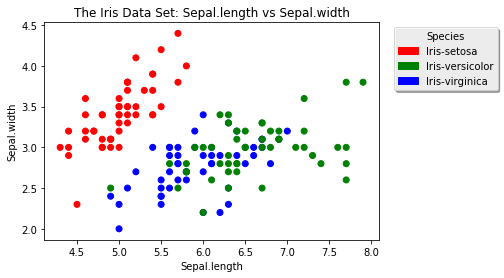

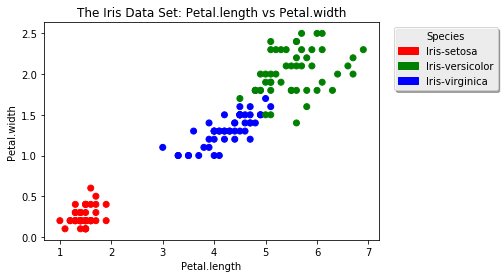

In [140]:
# ------------------- #
# PLOT TRAINING DATA 2D
# ------------------- #
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')

plt.scatter(df['sepal_length'], df['sepal_width'], c=colormap[df['species_idx']])
plt.title("The Iris Data Set: Sepal.length vs Sepal.width", fontsize=12)
# plt.legend(handles=[red_patch, green_patch, blue_patch], title='Species') # inside legend

plt.xlabel(r'Sepal.length', fontsize=10)
plt.ylabel(r'Sepal.width', fontsize=10)
plt.rcParams["figure.figsize"] = (6,4)

ax = plt.subplot(111)
ax.legend(handles=[red_patch, green_patch, blue_patch], title='Species', loc='upper center', bbox_to_anchor=(1.2,1), shadow=True, ncol=1)
# bbox_to_anchor=(a,b) => put legend outside plot.

plt.show()

# ===================== #
# =====Second plot===== #
# ===================== #

plt.scatter(df['petal_length'], df['petal_width'], c=colormap[df['species_idx']])
plt.title("The Iris Data Set: Petal.length vs Petal.width", fontsize=12)

plt.xlabel(r'Petal.length', fontsize=10)
plt.ylabel(r'Petal.width', fontsize=10)
plt.rcParams["figure.figsize"] = (6,4)

ax = plt.subplot(111)
ax.legend(handles=[red_patch, green_patch, blue_patch], title='Species', loc='upper center', bbox_to_anchor=(1.2,1), shadow=True, ncol=1)

In [207]:
# 10-fold cross validation. 
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:4]) # end index is exclusive
y = np.array(df['species'])

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

myList = list(range(1, 50))

neighbors_ = [x for x in myList if x%2 != 0]

cv_scores = []
k = 3

for k in neighbors_:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    
    cv_scores.append(scores.mean())

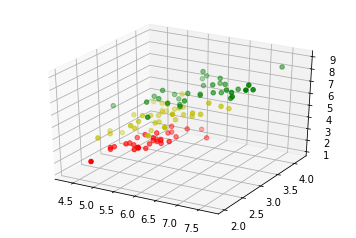

In [173]:
# ------------------- #
# PLOT TRAINING DATA 3D
# ------------------- #
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")

X = []
for iclass in range(len(species_set)):
    X.append([[], [], []])
    for i in range(len(X_train)):
        if y_train[i] == species_set[iclass]:
            X[iclass][0].append(X_train[i][0])
            X[iclass][1].append(X_train[i][1])
            X[iclass][2].append(sum(X_train[i][2:]))

colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for iclass in range(len(species_set)):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])

plt.show()

In [168]:
# FIND OPTIMAL NUMBER of NEIGHBORS K

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


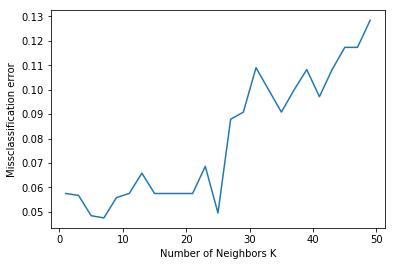

In [169]:
# plot misclassifictin error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Missclassification error')
plt.show()

In [157]:
# kNN from scratch


IndexError: list index out of range

In [170]:
species_set

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

In [180]:
def train(X_train, y_train):
    # do nothing
    return

In [186]:
def predict(X_train, y_train, x_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # calculate Euclidean distance between x_test and ith observation, add it into distances list
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i])))
        distances.append([distance, i]) 
        
    # sort the list
    distances = sorted(distances)
    
    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
        
    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [181]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # train the input data
    train(X_train, y_train)
    
    # loop over all test observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [206]:
# making predictions on test observations
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
print(predictions)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica']


In [204]:
# calculate accuracy (manually)
# correct = (predictions == y_test)
# accuracy = correct.sum() / correct.size

# transform the list into an array
predictions = np.asarray(predictions)

# calculate accuracy (with sklearn.metrics.accuracy_score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predictions, y_test)
print('\nThe accuracy of our classifier is %d%%', accuracy*100)


The accuracy of our classifier is %d%% 98.0


In [179]:
from collections import Counter
a = ['red', 'blue', 'red', 'green', 'blue', 'blue']
Counter(a).most_common(1)[0][0]

'blue'

In [209]:
# plot data with boundaries
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

h = .02 # step size in the mesh
n_neighbors = 7 # number of neighbors (k)
iris = datasets.load_iris() # load iris data

X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbors Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # put the result into a color plot
    

In [210]:


xx

array([[ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88]])

In [211]:
yy

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.02,  1.02,  1.02, ...,  1.02,  1.02,  1.02],
       [ 1.04,  1.04,  1.04, ...,  1.04,  1.04,  1.04],
       ..., 
       [ 5.34,  5.34,  5.34, ...,  5.34,  5.34,  5.34],
       [ 5.36,  5.36,  5.36, ...,  5.36,  5.36,  5.36],
       [ 5.38,  5.38,  5.38, ...,  5.38,  5.38,  5.38]])

In [212]:
xx.ravel()

array([ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88])

In [213]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.3 ,  1.  ],
       [ 3.32,  1.  ],
       [ 3.34,  1.  ],
       ..., 
       [ 8.84,  5.38],
       [ 8.86,  5.38],
       [ 8.88,  5.38]])